In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(16.7, 20.873214285714287, 23.3)]


In [10]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
data_2017 = calc_temps('2017-01-01', '2017-12-31')
data_2017

[(14.4, 23.413242662848948, 30.6)]

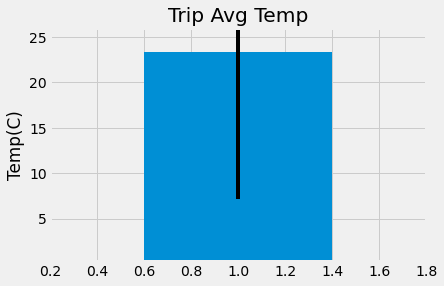

In [17]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
y = data_2017[0][1]
x = [1]
error_bar = (data_2017[0][2] - data_2017[0][0])
plt.bar(x, y, yerr=error_bar)
plt.xlim(0.2, 1.8)
plt.ylim(0.3, 26)
plt.title("Trip Avg Temp")
plt.ylabel("Temp(C)")
plt.savefig("images/temperature.png")
plt.show()

### Daily Rainfall Average

In [40]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
results = session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)).filter(Measurement.date >='2017-01-01').filter(Measurement.date <='2017-12-31').group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()
results


[('USC00516128',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  0.914,
  15725.70000000003),
 ('USC00519281',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  0.914,
  9981.899999999967),
 ('USC00513117',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  0.914,
  7915.500000000047),
 ('USC00519523',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  0.914,
  6248.700000000025),
 ('USC00514830',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  0.914,
  4986.900000000042),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  0.914,
  2439.0000000000177),
 ('USC00517948',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  0.914,
  775.8000000000002)]

In [44]:
rainfall_df = pd.DataFrame(results, columns=["ID","Name", "Latitude", "Longitude", "Elevation", "Rainfall"])
rainfall_df

,ID,Name,Latitude,Longitude,Elevation,Rainfall
0,USC00516128,"WAIKIKI 717.2, HI US",21.2716,-157.8168,0.914,15725.7
1,USC00519281,"WAIKIKI 717.2, HI US",21.2716,-157.8168,0.914,9981.9
2,USC00513117,"WAIKIKI 717.2, HI US",21.2716,-157.8168,0.914,7915.5
3,USC00519523,"WAIKIKI 717.2, HI US",21.2716,-157.8168,0.914,6248.7
4,USC00514830,"WAIKIKI 717.2, HI US",21.2716,-157.8168,0.914,4986.9
5,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,0.914,2439.0
6,USC00517948,"WAIKIKI 717.2, HI US",21.2716,-157.8168,0.914,775.8


### Daily Temperature Normals

In [45]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(16.7, 20.64230769230769, 25.0)]

In [83]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates
date_range = pd.date_range(start_date, end_date,)

# Strip off the year and save a list of strings in the format %m-%d
no_year_dates = [date_range[x].strftime("%m-%d")  for x in range(len(date_range))]
no_year_dates
# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.
normals = []
for date in range(len(no_year_dates)):
    data = daily_normals(no_year_dates[date])
    normals.append(data[0])
normals

[(19.4, 24.186, 28.3),
 (20.0, 24.220754716981123, 28.9),
 (21.1, 24.77777777777778, 29.4),
 (20.6, 24.84038461538462, 28.9),
 (20.6, 24.529629629629632, 27.8),
 (19.4, 24.582142857142852, 28.3),
 (21.7, 25.08235294117647, 28.3)]

In [94]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_df = pd.DataFrame(normals, columns=["Min temp", "Avg temp", "Max temp"])
trip_df["Date"] = date_range
trip_df_indexed = trip_df.set_index("Date")

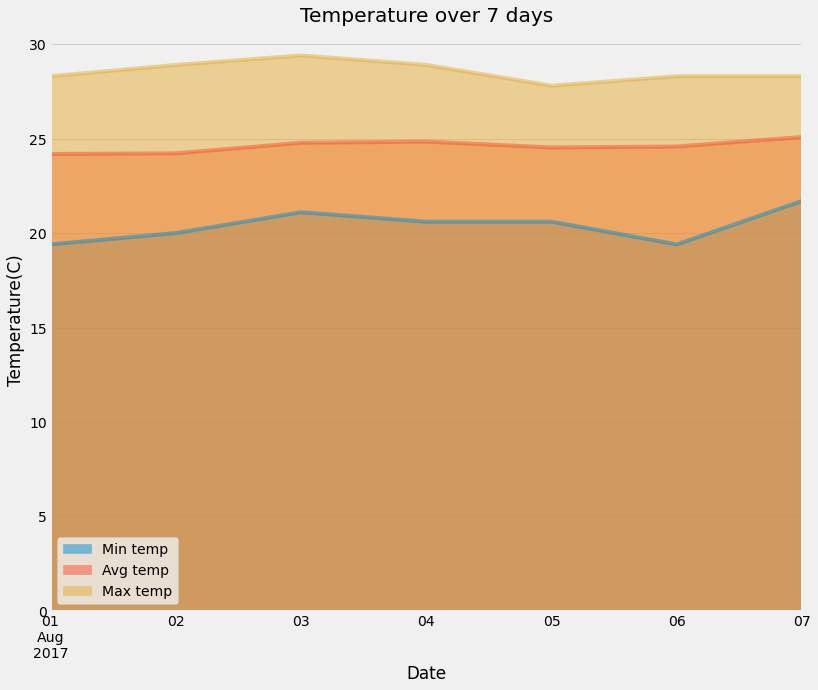

In [109]:
# Plot the daily normals as an area plot with `stacked=False`
trip_df_indexed.plot.area(stacked=False,figsize=(12,10))
plt.ylabel("Temperature(C)")
plt.title("Temperature over 7 days")
plt.savefig("images/daily-normals.png")
plt.show()


## Close Session

In [110]:
session.close()